# 4.1)

In [22]:
from PythonTsa.datadir import getdtapath
import pandas as pd
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [255]:
import scipy as stats
from scipy.stats import normaltest

In [2]:
import os
dtapath = getdtapath()
arquivos = os.listdir(dtapath)
for arquivo in arquivos:
    print(arquivo)

AntidiabeticDrugSales.csv
areturns.csv
AustraliaEmployedTotalPersons.xlsx
AustraliaUnemployedTotalPersons.xlsx
BitcoinPrice17-6-23-18-6-22.xlsx
chaos.csv
DAX.csv
DAXlogret.csv
dlGDPukcaus1q1980.csv
EconGermany.dat
elec-temp.csv
ExchRate NZ per UK.txt
gdpquarterlychina1992.1-2017.4.csv
Global mean surface air temp changes 1880-1985.csv
GlobalTemperature.txt
h02July1991June2008.csv
IBM.csv
ibmlogret.csv
milk.xlsx
monthly returns of PG stock 1961 to 2016.csv
monthly returns of Procter n Gamble stock n 3 market indexes 1961 to 2016.csv
nao.csv
Noboyngirl.csv
realGdpConsInv.csv
RwalkwDrift0.3.csv
Southtemperature.txt
SP500dailyreturns.csv
us-q-rgdp.csv
USbill.csv
USEconomicChange.csv
USFemalesAged20+Job1948-81.csv
usFOI.csv
usGDPnotAdjust.csv
USmacronInRate.txt
USQgdpunemp.csv
WTI-Brent.csv
Yearly mean total sunspot number 1700 - 2017.csv


In [7]:
dtapath=getdtapath()
nao =pd.read_csv(dtapath + 'nao.csv', header = 0)

In [8]:
nao

,year,month,index
0,1950,1,0.92000
1,1950,2,0.40000
2,1950,3,-0.36000
3,1950,4,0.73000
4,1950,5,-0.59000
...,...,...,...
826,2018,11,-0.11126
827,2018,12,0.61156
828,2019,1,0.59202
829,2019,2,0.29141


In [10]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig

In [12]:
import statsmodels

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
timeindex = pd.date_range('1950-01', periods = len(nao), freq='M')
nao.index = timeindex
nao

,year,month,index
1950-01-31,1950,1,0.92000
1950-02-28,1950,2,0.40000
1950-03-31,1950,3,-0.36000
1950-04-30,1950,4,0.73000
1950-05-31,1950,5,-0.59000
...,...,...,...
2018-11-30,2018,11,-0.11126
2018-12-31,2018,12,0.61156
2019-01-31,2019,1,0.59202
2019-02-28,2019,2,0.29141


In [19]:
naots = nao['index']

<Axes: >

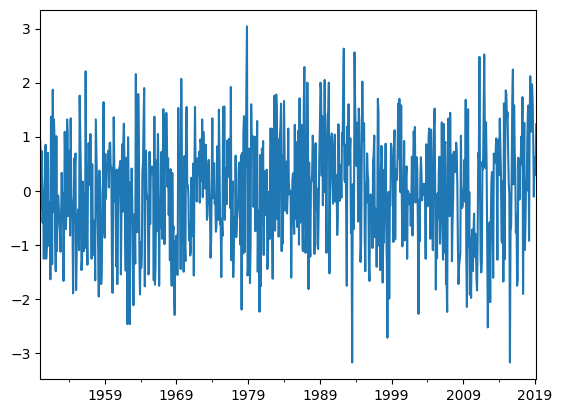

In [20]:
naots.plot()

In [23]:
sm.tsa.stattools.kpss(naots, regression = 'c', nlags = 50)

(0.3561836394749188,
 0.09604153470908672,
 50,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [79]:
ar1 = ARIMA(naots, order=(1,0,0), trend='n').fit()

In [80]:
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  index   No. Observations:                  831
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1176.011
Date:                Thu, 01 Aug 2024   AIC                           2356.022
Time:                        09:15:55   BIC                           2365.467
Sample:                    01-31-1950   HQIC                          2359.644
                         - 03-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1996      0.033      6.042      0.000       0.135       0.264
sigma2         0.9924      0.054     18.510      0.000       0.887       1.098
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.97
Prob(Q):                              0.87   Prob(JB):                         0.05
Heteroskedasticity (H):               1.01   Skew:                            -0.12
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
pred_ar1 = ar1.get_prediction(start='2010-04', end = '2019-12')
predicts = pred_ar1.predicted_mean
pred_conf = pred_ar1.conf_int()
predframe = pd.concat([naots['2010-04-30' :], predicts, pred_conf ['2019-04-30':]], axis=1)

<Axes: >

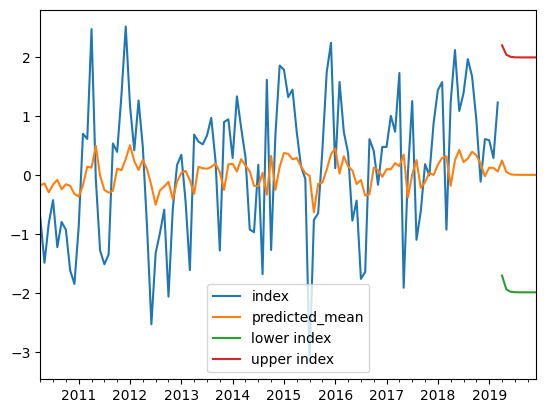

In [63]:
predframe.plot()

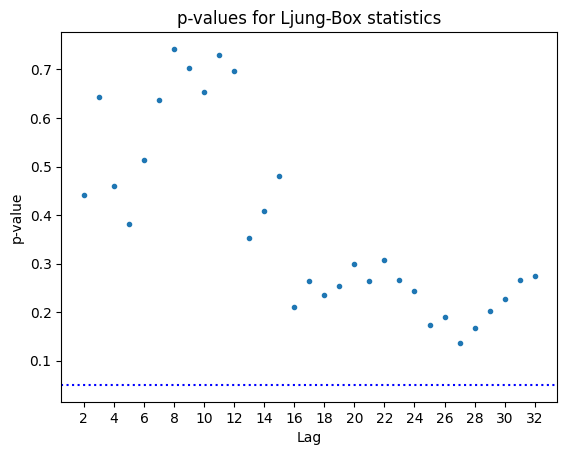

In [82]:
plot_LB_pvalue(ar1.resid, noestimatedcoef = 1, nolags= 32)

In [56]:
sm.tsa.arma_order_select_ic(naots, ic=['aic', 'bic', 'hqic'], max_ar = 6, max_ma = 7)

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

{'aic':              0            1            2            3            4  \
 0  2389.734206  2360.737118  2359.825553  2360.709955  2360.948820   
 1  2358.013318  2359.352406  2361.324649  2359.217896  2362.002702   
 2  2359.346378  2361.339097  2360.256617  2361.994457  2360.025389   
 3  2361.320028  2359.746661  2358.063542  2363.006434  2362.618892   
 4  2362.015380  2361.362545  2363.318722  2360.412120  2363.894428   
 5  2362.089232  2363.918041  2362.143947  2360.452398  2360.506367   
 6  2363.876904  2365.874341  2366.671296  2367.660065  2365.365884   
 
              5            6            7  
 0  2361.712940  2363.711736  2365.617729  
 1  2360.379472  2365.712931  2363.831079  
 2  2362.629800  2364.377092  2364.574134  
 3  2362.483757  2362.011934  2363.193794  
 4  2361.274756  2367.112475  2366.902308  
 5  2367.777750  2368.853622  2369.401158  
 6  2367.253713  2369.253272  2370.718829  ,
 'bic':              0            1            2            3         

vamos fazer um p, q diferente

In [70]:
arma22 = ARIMA(naots, order=(2,0,2), trend='c').fit()
arma22.summary()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  index   No. Observations:                  831
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1174.128
Date:                Thu, 01 Aug 2024   AIC                           2360.257
Time:                        09:11:43   BIC                           2388.592
Sample:                    01-31-1950   HQIC                          2371.122
                         - 03-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.045      0.089      0.929      -0.084       0.092
ar.L1         -0.5197      0.220     -2.365      0.018      -0.950      -0.089
ar.L2          0.3551      0.165      2.152      0.031       0.032       0.679
ma.L1          0.7199      0.226      3.186      0.001       0.277       1.163
ma.L2         -0.2039      0.187     -1.090      0.276      -0.571       0.163
sigma2         0.9879      0.054     18.354      0.000       0.882       1.093
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.15
Prob(Q):                              0.95   Prob(JB):                         0.05
Heteroskedasticity (H):               1.03   Skew:                            -0.12
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
pred_arma22= arma22.get_prediction(start='2010-04', end = '2019-12')
predicts2 = pred_arma22.predicted_mean
pred_conf2 = pred_arma22.conf_int()
predframe2 = pd.concat([naots['2010-04-30' :], predicts2, pred_conf2['2019-04-30':]], axis=1)

<Axes: >

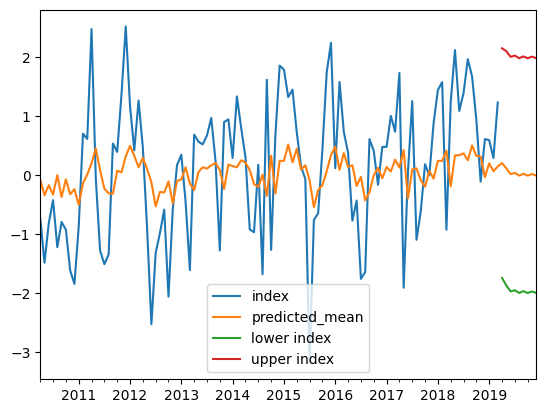

In [72]:
predframe2.plot()

In [74]:
arma22.resid

1950-01-31    0.915981
1950-02-28    0.212158
1950-03-31   -0.457178
1950-04-30    0.766875
1950-05-31   -0.730248
                ...   
2018-11-30   -0.424210
2018-12-31    0.646643
2019-01-31    0.392667
2019-02-28    0.226349
2019-03-31    1.085715
Freq: M, Length: 831, dtype: float64

In [75]:
from PythonTsa.LjungBoxtest import plot_LB_pvalue

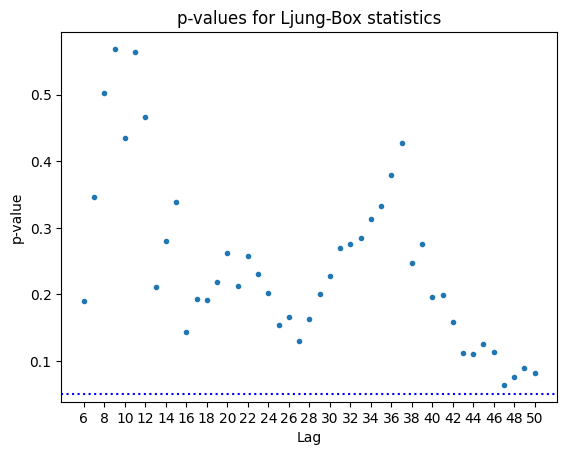

In [84]:
plot_LB_pvalue(arma22.resid, noestimatedcoef = 5, nolags= 50)

#4.2 

In [86]:
ar = np.array([1, -0.8 , 0.6])
ma = np.array([1, 0.7, 0.4])
arma_process = sm.tsa.ArmaProcess(ar,ma)

In [87]:
arma_process.isstationary

True

In [90]:
arma_process.isinvertible

True

In [91]:
np.random.seed(12357)

In [94]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [95]:
y = arma_generate_sample(ar=ar ,ma=ma, nsample=500)
y = pd.Series(y, name = 'y')

<Axes: >

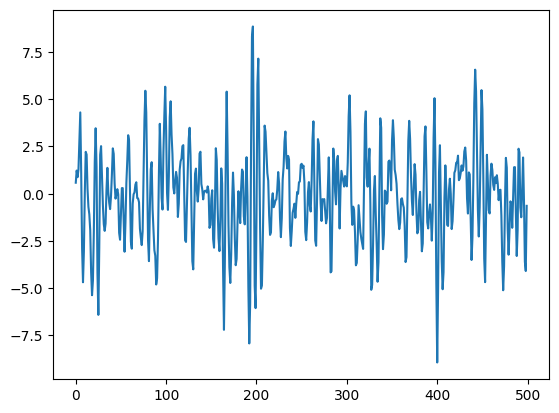

In [97]:
y.plot()

In [99]:
sm.tsa.arma_order_select_ic(y, ic=['aic', 'bic', 'hqic'], max_ar = 5, max_ma = 5)

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

{'aic':              0            1            2            3            4  \
 0  2307.559781  1859.362378  1619.668314  1529.464737  1531.441100   
 1  2030.947883  1728.358563  1582.527196  1615.407568  1510.549259   
 2  1594.040955  1511.553717  1456.824489  1457.629314  1459.588699   
 3  1475.128078  1477.119411  1457.677927  1459.222706  1461.235464   
 4  1477.114202  1475.172436  1459.674803  1456.718109  1462.480204   
 5  1469.456177  1467.279981  1460.794348  1462.296275  1464.284082   
 
              5  
 0  1491.305776  
 1  1486.007576  
 2  1460.750650  
 3  1461.912024  
 4  1455.937736  
 5  1466.133164  ,
 'bic':              0            1            2            3            4  \
 0  2315.988997  1872.006202  1636.526746  1550.537778  1556.728749   
 1  2043.591707  1745.216996  1603.600237  1640.695217  1540.051515   
 2  1610.899387  1532.626757  1482.112138  1487.131571  1493.305564   
 3  1496.201119  1502.407060  1487.180184  1492.939571  1499.166937   
 4  1

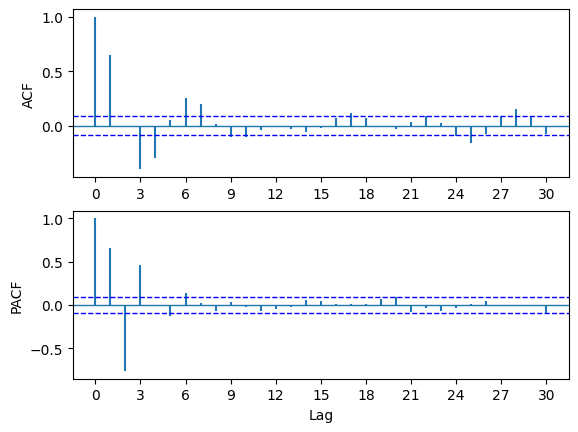

In [103]:
acf_pacf_fig(y, both = True)

In [142]:
arma30 = ARIMA(y, order=(3,0,0), trend='c').fit()
arma30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -732.564
Date:                Thu, 01 Aug 2024   AIC                           1475.128
Time:                        09:32:56   BIC                           1496.201
Sample:                             0   HQIC                          1483.397
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1117      0.143     -0.780      0.435      -0.392       0.169
ar.L1          1.5094      0.038     39.210      0.000       1.434       1.585
ar.L2         -1.3018      0.051    -25.304      0.000      -1.403      -1.201
ar.L3          0.4641      0.041     11.311      0.000       0.384       0.544
sigma2         1.0901      0.067     16.346      0.000       0.959       1.221
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.90   Prob(JB):                         0.67
Heteroskedasticity (H):               1.02   Skew:                             0.06
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [143]:
pred_arma30= arma30.get_prediction()
predicts30 = pred_arma30.predicted_mean
pred_conf30 = pred_arma30.conf_int()
predframe30 = pd.concat([y, predicts30, pred_conf30], axis=1)

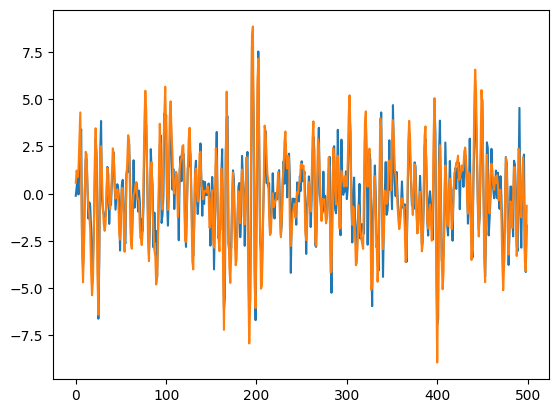

In [144]:
plt.plot(predicts30)
plt.plot(y)

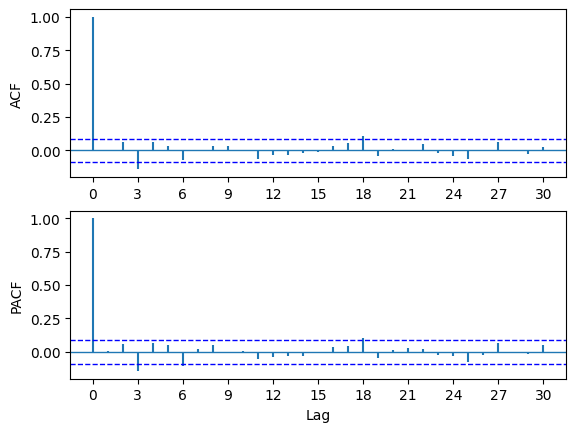

In [145]:
acf_pacf_fig(arma30.resid, both=True)

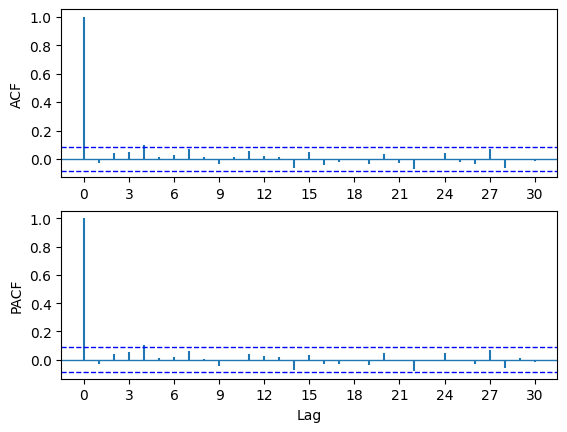

In [146]:
acf_pacf_fig(arma30.resid**2, both=True)

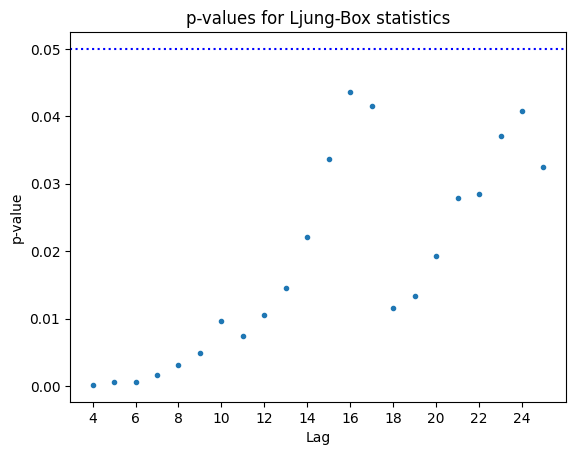

In [147]:
plot_LB_pvalue(arma30.resid, noestimatedcoef = 3, nolags= 25)

# 4.3

In [155]:
dtapath=getdtapath()
glob =pd.read_csv(dtapath + 'Global mean surface air temp changes 1880-1985.csv', header= None)

In [157]:
dates = pd.date_range('1880-12', periods = len(glob), freq = 'A-DEC')

In [158]:
glob.index = dates

In [162]:
tepts = pd.Series(glob[0], name = 'tep')
tepts

1880-12-31   -0.40
1881-12-31   -0.37
1882-12-31   -0.43
1883-12-31   -0.47
1884-12-31   -0.72
              ... 
1981-12-31    0.42
1982-12-31    0.02
1983-12-31    0.30
1984-12-31    0.09
1985-12-31    0.05
Freq: A-DEC, Name: tep, Length: 106, dtype: float64

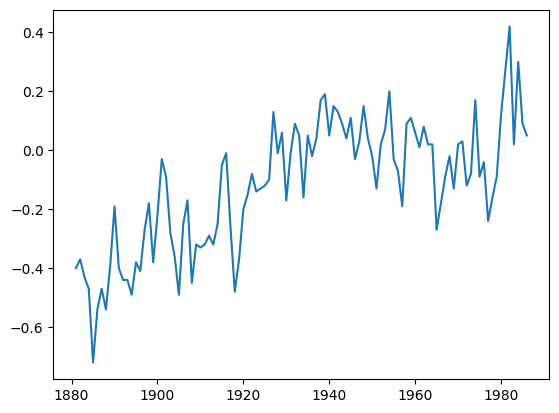

In [163]:
plt.plot(tepts)

In [176]:
dtepts = tepts.diff()
dtepts = dtepts.dropna()

Modelo do exemplo está abaixo

In [177]:
arma111 = ARIMA(dtepts, order=(1,0,1), trend='c').fit()
arma111.summary()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    tep   No. Observations:                  105
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  69.356
Date:                Thu, 01 Aug 2024   AIC                           -130.713
Time:                        09:48:13   BIC                           -120.097
Sample:                    12-31-1881   HQIC                          -126.411
                         - 12-31-1985                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.003      2.121      0.034       0.000       0.010
ar.L1          0.3925      0.107      3.683      0.000       0.184       0.601
ma.L1         -0.8876      0.061    -14.515      0.000      -1.007      -0.768
sigma2         0.0155      0.002      6.638      0.000       0.011       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.83   Prob(JB):                         0.84
Heteroskedasticity (H):               1.36   Skew:                            -0.08
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

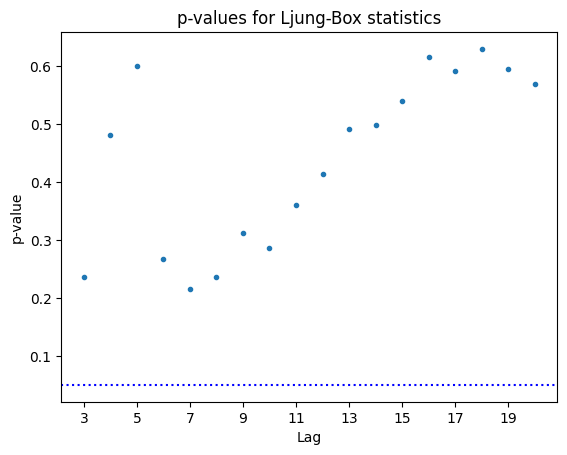

In [181]:
plot_LB_pvalue(arma111.resid, noestimatedcoef = 2, nolags= 20)

modelo diferente do exerciocio sobre o exemplo. Fazendo ARMA(1,3) no lugar de ARMA(1,1)

In [194]:
arma31 = ARIMA(dtepts, order=(1,0,3), trend='n').fit()
arma31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    tep   No. Observations:                  105
Model:                 ARIMA(1, 0, 3)   Log Likelihood                  72.148
Date:                Thu, 01 Aug 2024   AIC                           -134.296
Time:                        09:53:58   BIC                           -121.026
Sample:                    12-31-1881   HQIC                          -128.919
                         - 12-31-1985                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9624      0.057    -16.786      0.000      -1.075      -0.850
ma.L1          0.6272      0.104      6.055      0.000       0.424       0.830
ma.L2         -0.6475      0.102     -6.331      0.000      -0.848      -0.447
ma.L3         -0.4390      0.085     -5.145      0.000      -0.606      -0.272
sigma2         0.0146      0.002      6.076      0.000       0.010       0.019
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.62   Prob(JB):                         0.66
Heteroskedasticity (H):               1.08   Skew:                            -0.04
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

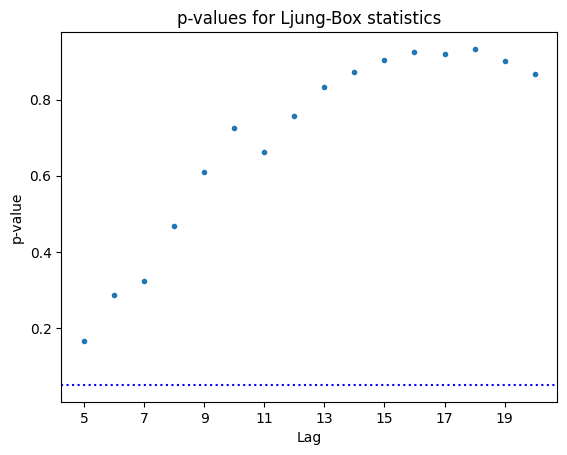

In [195]:
plot_LB_pvalue(arma31.resid, noestimatedcoef = 4, nolags= 20)

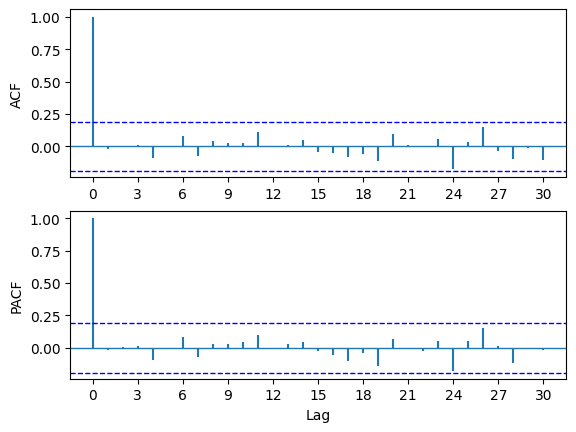

In [192]:
acf_pacf_fig(arma31.resid, both = True)

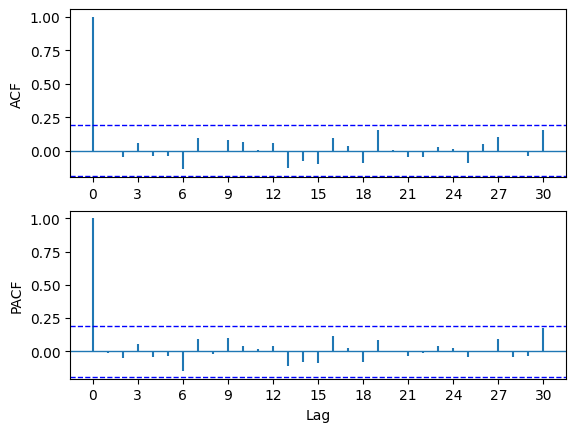

In [193]:
#fazer dos residuos ao quadrado
acf_pacf_fig(arma31.resid**2, both = True)

# 4.4

In [196]:
#testar o modelo Ly com Arima(6,1,7) , (0,1,1) e (0,1,6)

In [199]:
rat = pd.read_csv(dtapath + "USbill.csv", header = None)
rat.tail(6)

,0,1
456,1988/1/31,5.81
457,1988/2/29,5.66
458,1988/3/31,5.70
459,1988/4/30,5.91
460,1988/5/31,6.26
461,1988/6/30,6.46


In [214]:
y = rat[:456]

In [217]:
y.rename(columns={0: 'time', 1: 'bill'}, inplace=True)
dates = pd.date_range('1950-1', periods= len(y), freq ='M')
y.index = dates

C:\Users\guilh\AppData\Local\Temp\ipykernel_101532\3620114054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={0: 'time', 1: 'bill'}, inplace=True)


In [288]:
y

1950-01-31    1.07
1950-02-28    1.12
1950-03-31    1.12
1950-04-30    1.25
1950-05-31    1.16
              ... 
1987-08-31    6.04
1987-09-30    6.40
1987-10-31    6.13
1987-11-30    5.69
1987-12-31    5.77
Freq: M, Name: bill, Length: 456, dtype: float64

In [221]:
y=y['bill']

KeyError: 'bill'

<Axes: >

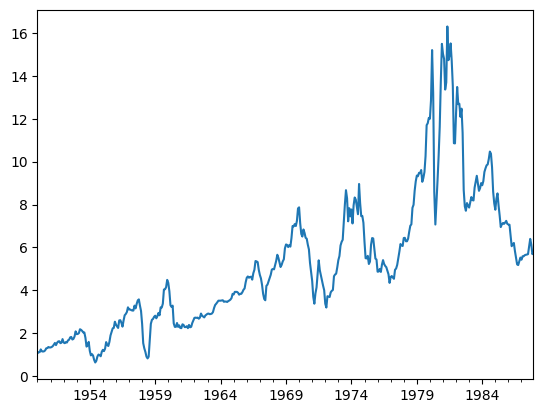

In [222]:
y.plot()

<Axes: >

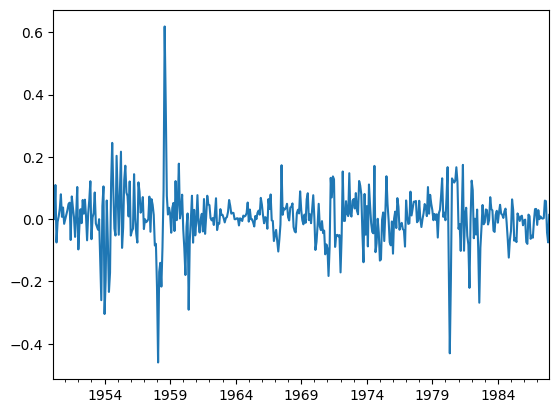

In [226]:
ly = np.log(y)
dly=ly.diff()
dly= dly.dropna()
dly.plot()

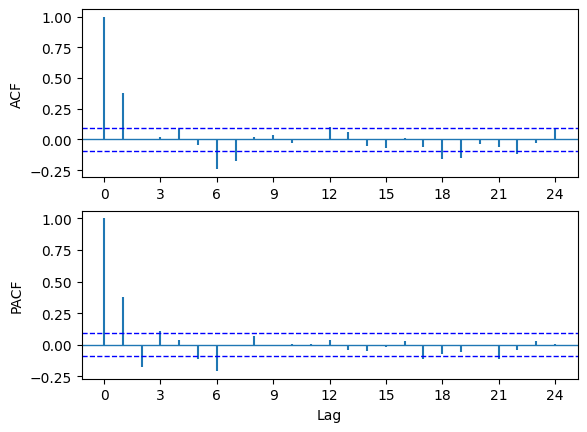

In [228]:
acf_pacf_fig(dly, both = True, lag =24)

In [229]:
sm.tsa.stattools.kpss(dly, regression = 'c', nlags = 'auto')

C:\Users\guilh\AppData\Local\Temp\ipykernel_101532\3410976378.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.stattools.kpss(dly, regression = 'c', nlags = 'auto')


(0.06937042978189786,
 0.1,
 5,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [230]:
#kpss tem que ser menor que os valores 0.34, 0.46,....0.73 para ser estacionário

In [231]:
sm.tsa.arma_order_select_ic(dly, ic=['aic', 'bic', 'hqic'], max_ar = 6, max_ma = 7)
#no modelo do TSA o aic deu (p,q)= (6,0), nesse deu (4,5).

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\guilh\AppData\Roami

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'aic':              0            1            2            3            4  \
 0  -933.948891 -1017.974389 -1015.994764 -1014.411213 -1013.218589   
 1 -1000.992364 -1015.992332 -1015.925389 -1012.475868 -1011.820021   
 2 -1012.976435 -1014.342901 -1013.312672 -1019.936616 -1024.250238   
 3 -1016.748586 -1014.939117 -1002.766347 -1031.667267 -1030.862929   
 4 -1015.373796 -1013.879093 -1029.540084 -1030.753217 -1032.178323   
 5 -1018.705248 -1025.739670 -1028.741774 -1030.519227 -1031.072807   
 6 -1036.714404 -1034.716554 -1034.282690 -1034.009614 -1031.758507   
 
              5            6            7  
 0 -1015.417082 -1018.824211 -1032.955516  
 1 -1012.251118 -1029.289879 -1031.268175  
 2 -1028.345544 -1027.897996 -1029.276292  
 3 -1021.638451 -1031.283351 -1037.631084  
 4 -1039.320528 -1035.464906 -1035.774881  
 5 -1034.240629 -1034.031794 -1034.598933  
 6 -1032.025578 -1033.972150 -1031.040107  ,
 'bic':              0            1           2           3           

In [232]:
#vamos terstar 3 modelos: (6,1,7),(0,1,1),(0,1,6)

In [361]:
arma617 = ARIMA(ly, order=(6,1,7), trend='n').fit()
arma617.summary()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   bill   No. Observations:                  456
Model:                 ARIMA(6, 1, 7)   Log Likelihood                 531.456
Date:                Thu, 01 Aug 2024   AIC                          -1034.913
Time:                        13:29:41   BIC                           -977.229
Sample:                    01-31-1950   HQIC                         -1012.188
                         - 12-31-1987                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5093      0.528      0.965      0.334      -0.525       1.543
ar.L2         -0.3300      0.307     -1.074      0.283      -0.932       0.272
ar.L3         -0.2538      0.222     -1.146      0.252      -0.688       0.180
ar.L4          0.6252      0.226      2.761      0.006       0.181       1.069
ar.L5         -0.7331      0.353     -2.078      0.038      -1.424      -0.042
ar.L6         -0.0062      0.469     -0.013      0.989      -0.926       0.913
ma.L1         -0.0666      0.531     -0.126      0.900      -1.107       0.973
ma.L2          0.1438      0.123      1.169      0.242      -0.097       0.385
ma.L3          0.4254      0.155      2.742      0.006       0.121       0.729
ma.L4         -0.4785      0.283     -1.690      0.091      -1.033       0.076
ma.L5          0.4543      0.259      1.757      0.079      -0.052       0.961
ma.L6          0.2321      0.338      0.687      0.492      -0.430       0.894
ma.L7         -0.1001      0.160     -0.627      0.530      -0.413       0.213
sigma2         0.0056      0.000     18.442      0.000       0.005       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               652.94
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

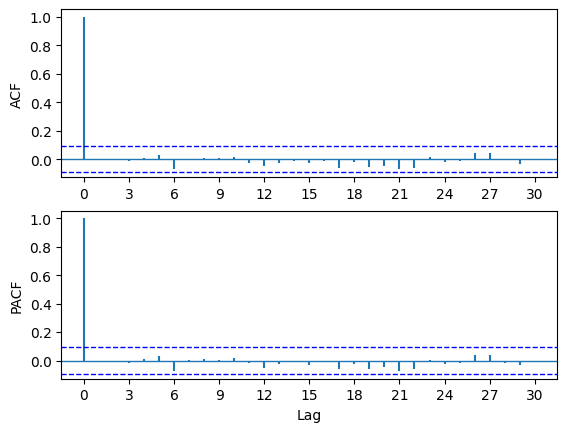

In [362]:
acf_pacf_fig(arma617.resid , both=True)

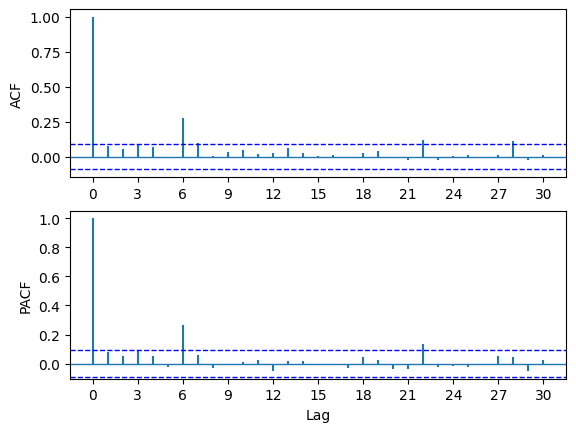

In [363]:
acf_pacf_fig(arma617.resid**2 , both=True)

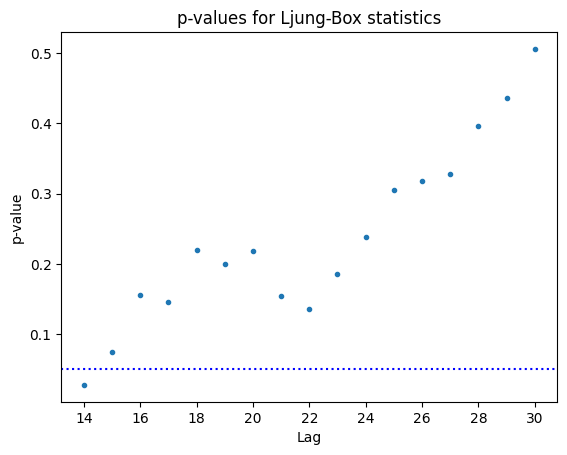

In [364]:
plot_LB_pvalue(arma617.resid , noestimatedcoef = 13, nolags= 30)

In [365]:
fo617 = arma617.predict(start = '1988-01', end = '1988-09', typ='linear')
np.exp(fo617)

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


1988-01-31    5.822307
1988-02-29    5.810106
1988-03-31    5.752663
1988-04-30    5.713344
1988-05-31    5.764982
1988-06-30    5.858684
1988-07-31    5.848226
1988-08-31    5.816121
1988-09-30    5.841813
Freq: M, Name: predicted_mean, dtype: float64

<Axes: >

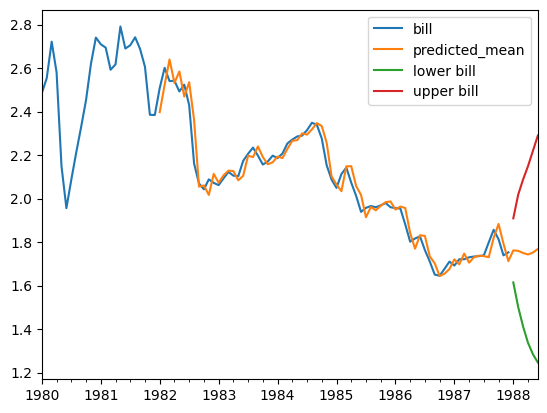

In [366]:
pred_arma617 = arma617.get_prediction(start='1982-01', end = '1988-06')
predicts617 = pred_arma617.predicted_mean
pred_conf617 = pred_arma617.conf_int()
predframe617 = pd.concat([ly['1980-01-31' :], predicts617, pred_conf617['1988-01-31':]], axis=1)
predframe617.plot()

In [354]:
#modelo 011
arma011 = ARIMA(ly, order=(0,1,1), trend='n').fit()
arma011.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   bill   No. Observations:                  456
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 511.734
Date:                Thu, 01 Aug 2024   AIC                          -1019.467
Time:                        13:27:35   BIC                          -1011.227
Sample:                    01-31-1950   HQIC                         -1016.221
                         - 12-31-1987                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4539      0.036     12.607      0.000       0.383       0.524
sigma2         0.0062      0.000     29.604      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1274.69
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

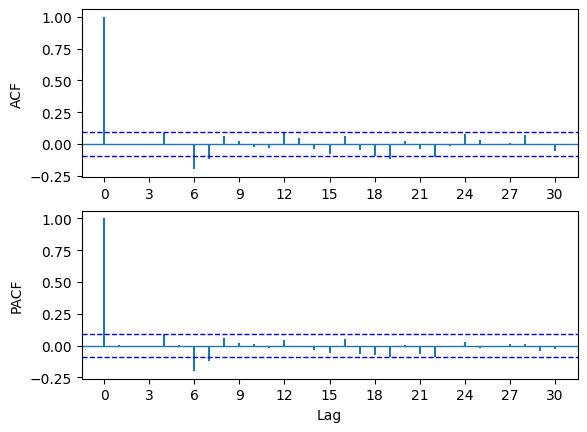

In [355]:
acf_pacf_fig(arma011.resid , both=True)

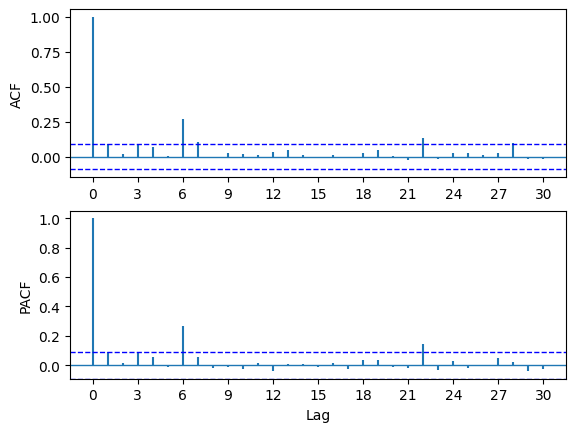

In [356]:
acf_pacf_fig(arma011.resid**2 , both=True)

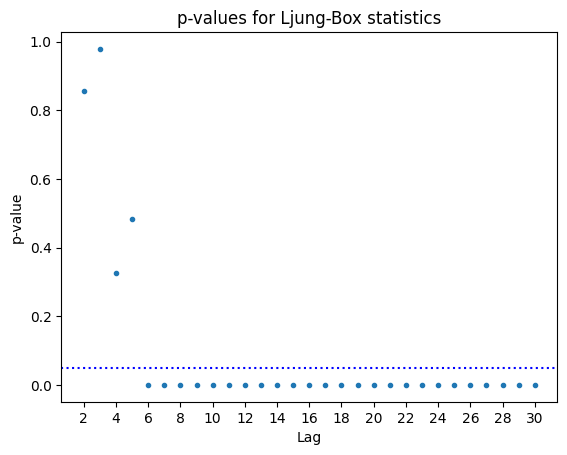

In [357]:
plot_LB_pvalue(arma011.resid , noestimatedcoef = 1, nolags= 30)

<Axes: >

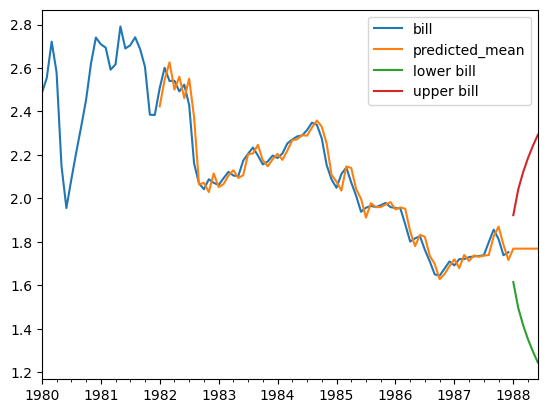

In [359]:
pred_arma011 = arma011.get_prediction(start='1982-01', end = '1988-06')
predicts011 = pred_arma011.predicted_mean
pred_conf011 = pred_arma011.conf_int()
predframe011 = pd.concat([ly['1980-01-31' :], predicts011, pred_conf011['1988-01-31':]], axis=1)
predframe011.plot()

In [336]:
# ultimo modelo (0,1,6)
arma016 = ARIMA(ly, order=(0,1,6), trend='n').fit()
arma016.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   bill   No. Observations:                  456
Model:                 ARIMA(0, 1, 6)   Log Likelihood                 517.167
Date:                Thu, 01 Aug 2024   AIC                          -1020.333
Time:                        13:25:03   BIC                           -991.491
Sample:                    01-31-1950   HQIC                         -1008.971
                         - 12-31-1987                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4164      0.036     11.500      0.000       0.345       0.487
ma.L2          0.0152      0.046      0.329      0.742      -0.076       0.106
ma.L3          0.0413      0.043      0.971      0.331      -0.042       0.125
ma.L4          0.1088      0.041      2.633      0.008       0.028       0.190
ma.L5          0.0307      0.054      0.573      0.567      -0.074       0.136
ma.L6         -0.1196      0.047     -2.568      0.010      -0.211      -0.028
sigma2         0.0060      0.000     25.871      0.000       0.006       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              1216.87
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

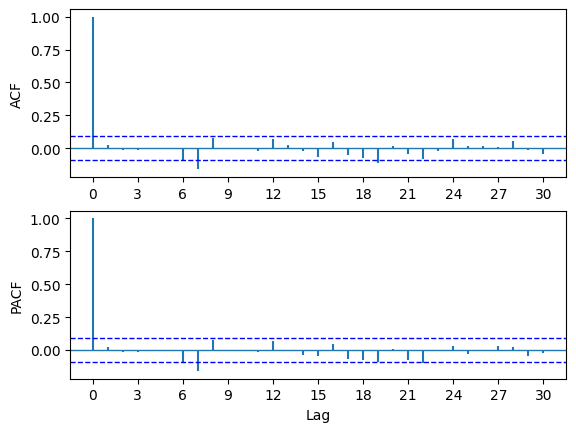

In [337]:
acf_pacf_fig(arma016.resid , both=True)

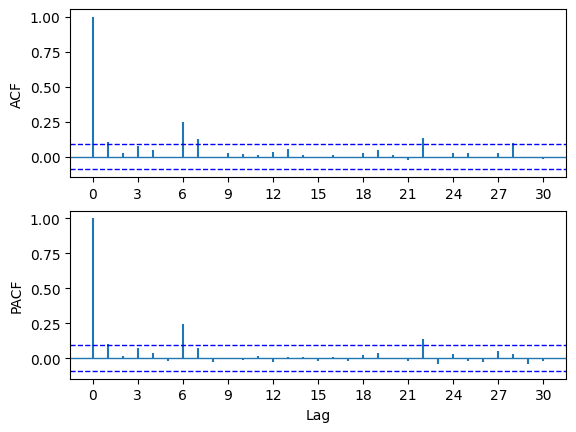

In [338]:
acf_pacf_fig(arma016.resid**2 , both=True)

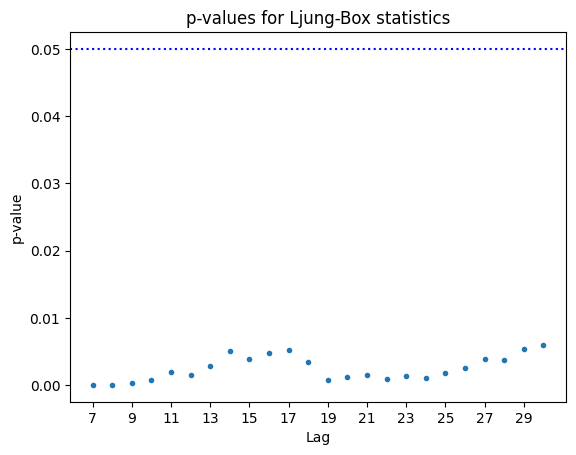

In [339]:
plot_LB_pvalue(arma016.resid , noestimatedcoef = 6, nolags= 30)

In [340]:
statistic, p_value = normaltest(arma016.resid)
print(statistic, p_value)

81.05870296779291 2.5022246345184775e-18


<Axes: >

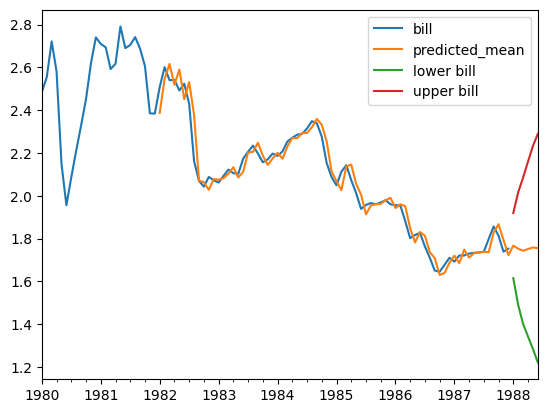

In [352]:
pred_arma016 = arma016.get_prediction(start='1982-01', end = '1988-06')
predicts016 = pred_arma016.predicted_mean
pred_conf016 = pred_arma016.conf_int()
predframe016 = pd.concat([ly['1980-01-31' :], predicts016, pred_conf016['1988-01-31':]], axis=1)
predframe016.plot()

In [372]:
print(predframe617['predicted_mean'][-5:])
print(predframe016['predicted_mean'][-5:])
print(predframe011['predicted_mean'][-5:])

1988-02-29    1.759599
1988-03-31    1.749663
1988-04-30    1.742804
1988-05-31    1.751802
1988-06-30    1.767925
Freq: M, Name: predicted_mean, dtype: float64
1988-02-29    1.752708
1988-03-31    1.742979
1988-04-30    1.750965
1988-05-31    1.758470
1988-06-30    1.754887
Freq: M, Name: predicted_mean, dtype: float64
1988-02-29    1.769002
1988-03-31    1.769002
1988-04-30    1.769002
1988-05-31    1.769002
1988-06-30    1.769002
Freq: M, Name: predicted_mean, dtype: float64


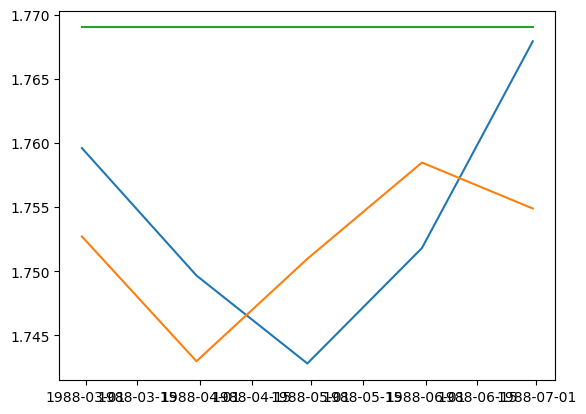

In [373]:
plt.plot(predframe617['predicted_mean'][-5:])
plt.plot(predframe016['predicted_mean'][-5:])
plt.plot(predframe011['predicted_mean'][-5:])